# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
# Dependencies
# this uses a forked version of citipy.  If citipy is already installed, run 'pip uninstall citypy' and then run 'pip install git+https://github.com/Enestvedt/citipy.git@master#egg=citipy'. All else remains the same.

import pandas as pd
import json
import requests
from config import weather_api_key
from citipy import citipy
import random
from pprint import pprint
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

## Generate Cities List

In [3]:


#initialize dataframe to hold citypy data for the 500 cities
cities_list_df = pd.DataFrame(columns = ['city_name', 'country_code', 'latitude', 'longitude'])

n=0
while n < 500:

    #generate random coordinates
    my_lat = round(random.uniform(-90.00, 90.00),2)
    my_lng = round(random.uniform(-180.00, 180.00),2)

    # #get city from citypy
    city = citipy.nearest_city(my_lat , my_lng)

    city_nm = city.city_name
    ctry_cd = city.country_code
    city_lat = city.city_lat
    city_lng = city.city_lng


    #create new row data
    new_row = {'city_name': city_nm, 'country_code': ctry_cd, 'latitude':city_lat, 'longitude': city_lng}    
    
    #make sure this city doesn't already exist
    if ((cities_list_df['city_name'] == city_nm) & (cities_list_df['country_code'] == ctry_cd)).any():
        continue
    
    #not found - write the data
    else:
        cities_list_df = cities_list_df.append(new_row, ignore_index=True)
        n = len(cities_list_df)
        
#show the dataframe
cities_list_df


,city_name,country_code,latitude,longitude
0,gornopravdinsk,ru,60.05,69.9
1,thompson,ca,55.75,-97.866667
2,yellowknife,ca,62.45,-114.35
3,rikitea,pf,-23.1202778,-134.9691667
4,palabuhanratu,id,-6.9875,106.551389
...,...,...,...,...
495,paamiut,gl,62.0,-49.75
496,wamba,cd,2.15,28
497,ust-kuyga,ru,70.016667,135.6
498,monte alegre de minas,br,-18.866667,-48.866667


In [4]:
#add colums for retrieved data
new_cols = ['Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Date']
for col in new_cols:
    cities_list_df[col] = ""
cities_list_df

,city_name,country_code,latitude,longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,gornopravdinsk,ru,60.05,69.9,,,,,
1,thompson,ca,55.75,-97.866667,,,,,
2,yellowknife,ca,62.45,-114.35,,,,,
3,rikitea,pf,-23.1202778,-134.9691667,,,,,
4,palabuhanratu,id,-6.9875,106.551389,,,,,
...,...,...,...,...,...,...,...,...,...
495,paamiut,gl,62.0,-49.75,,,,,
496,wamba,cd,2.15,28,,,,,
497,ust-kuyga,ru,70.016667,135.6,,,,,
498,monte alegre de minas,br,-18.866667,-48.866667,,,,,


### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [6]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

print("""
Beginning processing weather data:
------------------------------------------""")

#loop dataframe randomly created above and return weather data
for ind in cities_list_df.index:
    
    #get city data
    city_lat = str(cities_list_df['latitude'][ind])
    city_lng = str(cities_list_df['longitude'][ind])
    city_name = (cities_list_df['city_name'][ind])
    country_code = (cities_list_df['country_code'][ind])
    
    # Build query URL
    query_url = f"{url}lat={city_lat}&lon={city_lng}&cnt=25&units={units}&appid={weather_api_key}"
    #query_url = url + "lat=" + city_lat + "&lon=" + city_lng + "&cnt=50" + "&appid=" + api_key
        
    #make request
    response = requests.get(query_url).json()

    try:
        print(f"Processing Record {ind + 1} of 500: {city_name}, {country_code}.")
        #gather data
        my_temp = response['main']['temp_max']
        my_hum = response['main']['humidity']
        my_wind = response['wind']['speed']
        my_cloud = response['clouds']['all']
        my_date = response['dt']
        
        #write data to df
        cities_list_df.loc[cities_list_df.index[ind], 'Max Temp'] = my_temp
        cities_list_df.loc[cities_list_df.index[ind], 'Humidity'] = my_hum
        cities_list_df.loc[cities_list_df.index[ind], 'Cloudiness'] = my_cloud
        cities_list_df.loc[cities_list_df.index[ind], 'Wind Speed'] = my_wind
        cities_list_df.loc[cities_list_df.index[ind], 'Date'] = my_date

    except (KeyError, IndexError):
        print("Missing field/result... skipping.")



Beginning processing weather data:
------------------------------------------
Processing Record 1 of 500: gornopravdinsk, ru.
Processing Record 2 of 500: thompson, ca.
Processing Record 3 of 500: yellowknife, ca.
Processing Record 4 of 500: rikitea, pf.
Processing Record 5 of 500: palabuhanratu, id.
Processing Record 6 of 500: mataura, pf.
Processing Record 7 of 500: ushuaia, ar.
Processing Record 8 of 500: sogne, no.
Processing Record 9 of 500: punta arenas, cl.
Processing Record 10 of 500: busselton, au.
Processing Record 11 of 500: ambulu, id.
Processing Record 12 of 500: nanortalik, gl.
Processing Record 13 of 500: dongning, cn.
Processing Record 14 of 500: praya, id.
Processing Record 15 of 500: teya, ru.
Processing Record 16 of 500: khatanga, ru.
Processing Record 17 of 500: hobart, au.
Processing Record 18 of 500: hermanus, za.
Processing Record 19 of 500: alamor, ec.
Processing Record 20 of 500: mitsamiouli, km.
Processing Record 21 of 500: grand river south east, mu.
Processi

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
cities_list_df.to_csv('../output_data/weather_data.csv')

cities_list_df

,city_name,country_code,latitude,longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,gornopravdinsk,ru,60.05,69.9,34.41,96,100,10.22,1619812302
1,thompson,ca,55.75,-97.866667,42.8,33,90,6.91,1619812302
2,yellowknife,ca,62.45,-114.35,33.01,93,90,11.5,1619812302
3,rikitea,pf,-23.1202778,-134.9691667,78.87,77,77,20.09,1619812303
4,palabuhanratu,id,-6.9875,106.551389,80.01,94,47,2.73,1619812303
...,...,...,...,...,...,...,...,...,...
495,paamiut,gl,62.0,-49.75,37.33,85,0,6.82,1619812441
496,wamba,cd,2.15,28,68.41,99,100,3.62,1619812442
497,ust-kuyga,ru,70.016667,135.6,29.68,91,98,3.04,1619812442
498,monte alegre de minas,br,-18.866667,-48.866667,75.2,57,40,12.66,1619812443


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
cities_list_df.dtypes


city_name       object
country_code    object
latitude        object
longitude       object
Max Temp        object
Humidity        object
Cloudiness      object
Wind Speed      object
Date            object
dtype: object

In [9]:
cities_list_df = cities_list_df
cities_list_df[['latitude', 'longitude', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']] = cities_list_df[['latitude', 'longitude', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']].apply(pd.to_numeric)

#convert date columne to date dt
cities_list_df[['Date']] = pd.to_datetime(cities_list_df['Date'], origin='unix', unit='s')

#describe the numeric column data
cities_list_df

,city_name,country_code,latitude,longitude,Max Temp,Humidity,Cloudiness,Wind Speed,Date
0,gornopravdinsk,ru,60.050000,69.900000,34.41,96,100,10.22,2021-04-30 19:51:42
1,thompson,ca,55.750000,-97.866667,42.80,33,90,6.91,2021-04-30 19:51:42
2,yellowknife,ca,62.450000,-114.350000,33.01,93,90,11.50,2021-04-30 19:51:42
3,rikitea,pf,-23.120278,-134.969167,78.87,77,77,20.09,2021-04-30 19:51:43
4,palabuhanratu,id,-6.987500,106.551389,80.01,94,47,2.73,2021-04-30 19:51:43
...,...,...,...,...,...,...,...,...,...
495,paamiut,gl,62.000000,-49.750000,37.33,85,0,6.82,2021-04-30 19:54:01
496,wamba,cd,2.150000,28.000000,68.41,99,100,3.62,2021-04-30 19:54:02
497,ust-kuyga,ru,70.016667,135.600000,29.68,91,98,3.04,2021-04-30 19:54:02
498,monte alegre de minas,br,-18.866667,-48.866667,75.20,57,40,12.66,2021-04-30 19:54:03


In [10]:
cities_list_df.describe()

,latitude,longitude,Max Temp,Humidity,Cloudiness,Wind Speed
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.00000
mean,18.850960,18.935676,62.428160,68.832000,55.778000,8.07388
std,34.221801,93.209629,20.713914,23.122827,39.637141,5.51103
min,-54.800000,-179.500000,3.880000,4.000000,0.000000,0.18000
25%,-9.659192,-61.841667,45.845000,59.000000,20.000000,3.87000
50%,21.005695,27.062185,70.000000,75.000000,64.500000,6.88000
75%,48.137500,98.198100,78.800000,86.000000,98.000000,11.45750
max,78.216667,179.316667,99.000000,100.000000,100.000000,34.27000


In [11]:
#  Get the indices of cities that have humidity over 100%.
cities_list_df.index[cities_list_df['Humidity'] > 100]

Int64Index([], dtype='int64')

In [40]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# there were no cities matching the criteria


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

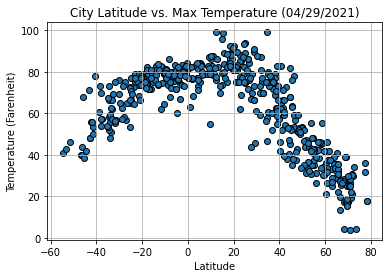

In [12]:
#create a scatter plot
plt.scatter(cities_list_df["latitude"], cities_list_df["Max Temp"], c='tab:blue', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Max Temperature (04/29/2021)")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Temp_Lat.png")

# Show plot
plt.show()

The city latitude vs max temperature chart above shows a strong correlation between latitude and temperatur, though it does flatten out betwee -20 and 20 lat.

## Latitude vs. Humidity Plot

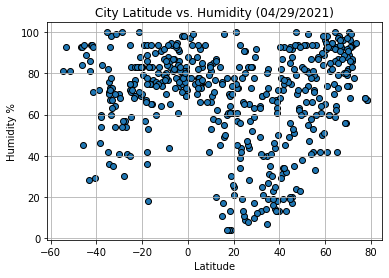

In [13]:
#create a scatter plot
plt.scatter(cities_list_df["latitude"], cities_list_df["Humidity"], c='tab:blue', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity (04/29/2021)")
plt.ylabel("Humidity %")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Humidity_Lat.png")

# Show plot
plt.show()

The above chart shows that there not really any correlation between humidity and latitude.  Humidity must be caused by other conditions.

## Latitude vs. Cloudiness Plot

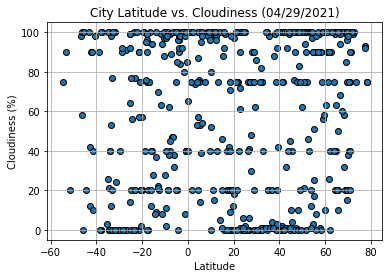

In [14]:
#create a scatter plot
plt.scatter(cities_list_df["latitude"], cities_list_df["Cloudiness"], c='tab:blue', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness (04/29/2021)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Clouds_Lat.png")

# Show plot
plt.show()

As expected, there is no correlation between cloudiness and latitude.  Not much to say about this.

## Latitude vs. Wind Speed Plot

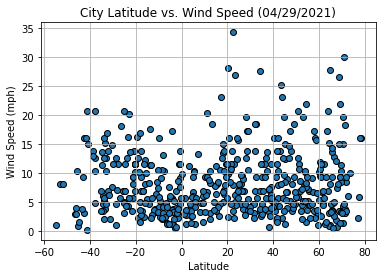

In [15]:
#create a scatter plot
plt.scatter(cities_list_df["latitude"], cities_list_df["Wind Speed"], c='tab:blue', edgecolors='black')

# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed (04/29/2021)")
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Wind_Lat.png")
# Show plot
plt.show()

I'm not sure who would think that wind speed would be affected by latitude coordinate, but this shows that there is no relationship just to demonstrate it.

## Linear Regression

In [16]:
#filter northern hemisphere
northern_hem_df = cities_list_df[cities_list_df['latitude'] > 0]

#filter northern hemisphere
southern_hem_df = cities_list_df[cities_list_df['latitude'] < 0]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8848014961912005


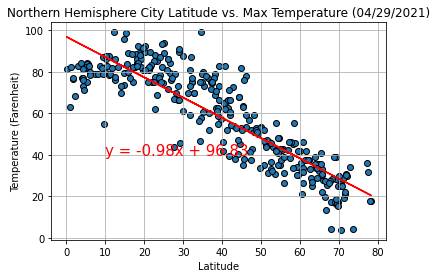

In [17]:
#get northern hemisphere data
x_values = northern_hem_df['latitude']
y_values =northern_hem_df["Max Temp"]

#regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatter plot
plt.scatter(x_values, y_values, c='tab:blue', edgecolors='black')
plt.title("Northern Hemisphere City Latitude vs. Max Temperature (04/29/2021)")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

#plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(10,40),fontsize=15,color="red")

# Save the figure
plt.savefig("../output_data/nh_temp_regress.png")

#display data
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.7878367556596355


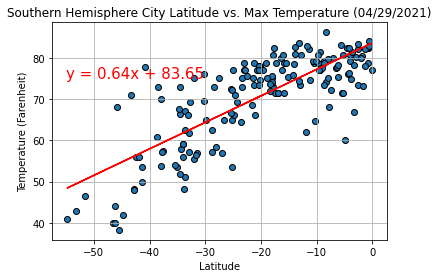

In [18]:
#get southern hemisphere data
x_values = southern_hem_df['latitude']
y_values = southern_hem_df["Max Temp"]

#regression line
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatter plot
plt.scatter(x_values, y_values, c='tab:blue', edgecolors='black')
plt.title("Southern Hemisphere City Latitude vs. Max Temperature (04/29/2021)")
plt.ylabel("Temperature (Farenheit)")
plt.xlabel("Latitude")
plt.grid(True)

#plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,75),fontsize=15,color="red")

plt.savefig("../output_data/sh_temp_regress.png")

#display data
print(f"The r-value is: {rvalue}")
plt.show()

The linear regression line models the change in temperature as we get closer to the equator fairly well.  The change in temp is greater in the norther hemisphere than it is in the souther hemisphere.  This may be due to opposing seasons (summer/winter).

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.23697541524986235


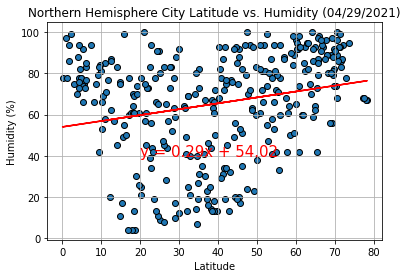

In [19]:
#get northern hemisphere data
x_values = northern_hem_df['latitude']
y_values =northern_hem_df["Humidity"]

#regression lin
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatter plot
plt.scatter(x_values, y_values, c='tab:blue', edgecolors='black')
plt.title("Northern Hemisphere City Latitude vs. Humidity (04/29/2021)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,40),fontsize=15,color="red")

plt.savefig("../output_data/nh_humid_regress.png")

#display data
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.2057536324977781


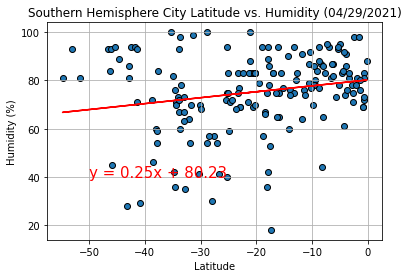

In [20]:
#get southern hemisphere data
x_values = southern_hem_df['latitude']
y_values =southern_hem_df["Humidity"]

#regression lin
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatter plot
plt.scatter(x_values, y_values, c='tab:blue', edgecolors='black')
plt.title("Southern Hemisphere City Latitude vs. Humidity (04/29/2021)")
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)

#plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,40),fontsize=15,color="red")

plt.savefig("../output_data/sh_humid_regress.png")

#display data
print(f"The r-value is: {rvalue}")
plt.show()

The linear regression line models the change in humidity as we get closer to the equator is not reliable.  There is some general relationship, though the low r-value means it is pretty weak relationship.

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.12426897993482593


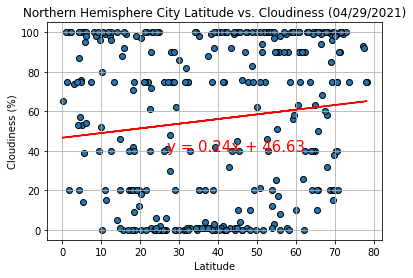

In [21]:
#get northern hemisphere data
x_values = northern_hem_df['latitude']
y_values =northern_hem_df["Cloudiness"]

#regression lin
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatter plot
plt.scatter(x_values, y_values, c='tab:blue', edgecolors='black')
plt.title("Northern Hemisphere City Latitude vs. Cloudiness (04/29/2021)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(27,40),fontsize=15,color="red")

plt.savefig("../output_data/nh_cloud_regress.png")

#display data
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.19288624173075233


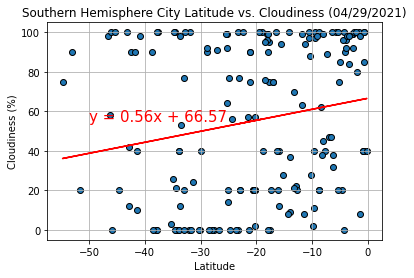

In [22]:
#get southern hemisphere data
x_values = southern_hem_df['latitude']
y_values =southern_hem_df["Cloudiness"]

#regression lin
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatter plot
plt.scatter(x_values, y_values, c='tab:blue', edgecolors='black')
plt.title("Southern Hemisphere City Latitude vs. Cloudiness (04/29/2021)")
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)

#plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-50,55),fontsize=15,color="red")

plt.savefig("../output_data/sh_cloud_regress.png")

#display data
print(f"The r-value is: {rvalue}")
plt.show()

The linear regression line models the change in cloudiness as we get closer to the equator is not a good fit.  The low r-value means there is really no relationship.

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.054021867685807974


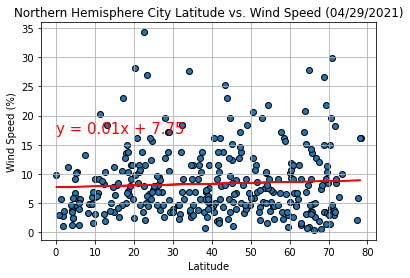

In [23]:
#get northern hemisphere data
x_values = northern_hem_df['latitude']
y_values =northern_hem_df["Wind Speed"]

#regression lin
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatter plot
plt.scatter(x_values, y_values, c='tab:blue', edgecolors='black')
plt.title("Northern Hemisphere City Latitude vs. Wind Speed (04/29/2021)")
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

#plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,17),fontsize=15,color="red")

plt.savefig("../output_data/nh_wind_regress.png")

#display data
print(f"The r-value is: {rvalue}")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.21380325660977145


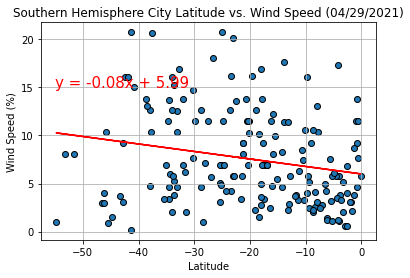

In [24]:
#get southern hemisphere data
x_values = southern_hem_df['latitude']
y_values =southern_hem_df["Wind Speed"]

#regression lin
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#scatter plot
plt.scatter(x_values, y_values, c='tab:blue', edgecolors='black')
plt.title("Southern Hemisphere City Latitude vs. Wind Speed (04/29/2021)")
plt.ylabel("Wind Speed (%)")
plt.xlabel("Latitude")
plt.grid(True)

#plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,15),fontsize=15,color="red")

plt.savefig("../output_data/sh_wind_regress.png")

#display data
print(f"The r-value is: {rvalue}")
plt.show()

The linear regression line models the change in wind speeds as we get closer to the equator is not a good fit.  The low r-value means there is really no relationship.


The stuff Below here is just for fun.  I made a function to return all of the charts at once:

In [25]:
def make_plot(y, regress, hem):
    
    run_date = cities_list_df.iloc[0]['Date'].date().strftime("%m/%d/%Y")

    #set the hemisphere
    if hem == 'northern':

        #get southern hemisphere data
        x_values = northern_hem_df['latitude']
        y_values = northern_hem_df[y]
    
    elif hem == 'southern':

        x_values = southern_hem_df["latitude"]
        y_values = southern_hem_df[y]

    else:
        x_values = cities_list_df['latitude']
        y_values = cities_list_df[y]

    #scatter plot
    plt.scatter(x_values, y_values, c='tab:blue', edgecolors='black')
    plt.title(f"City Latitude vs. {y} ({run_date})")
    plt.ylabel(f"{y} (%)")
    plt.xlabel("Latitude")
    plt.grid(True)

    if regress:
        #regression lin
        (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
        regress_values = x_values * slope + intercept
        line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

        #plot regression line
        plt.plot(x_values,regress_values,"r-")
        #plt.annotate(line_eq,location='best' ,fontsize=15,color="red")

        print(f"The r-value is: {rvalue}")

    #display data
    
    plt.show()


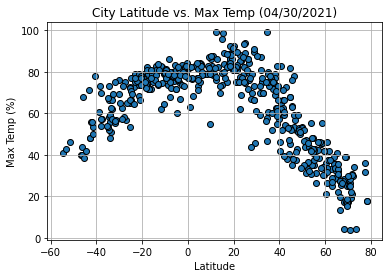

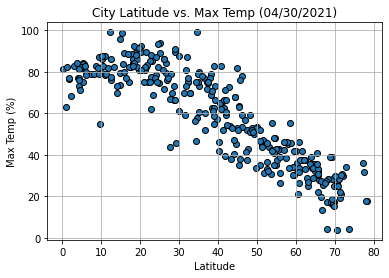

The r-value is: -0.8848014961912005


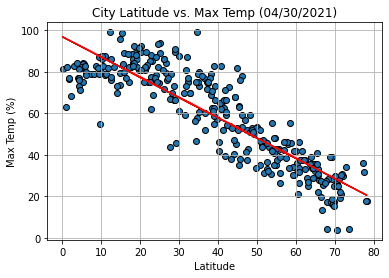

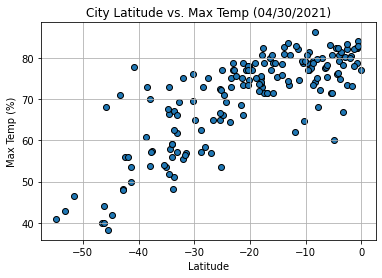

The r-value is: 0.7878367556596355


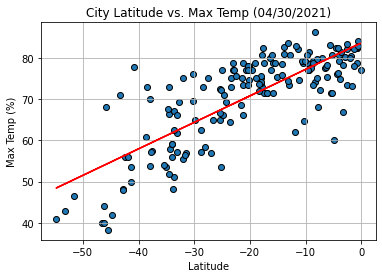

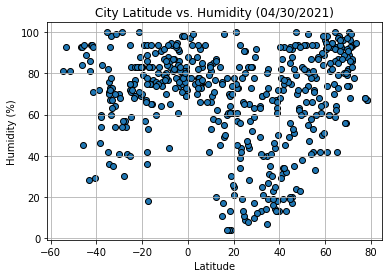

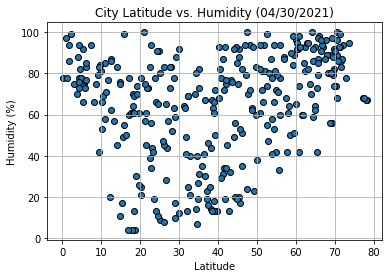

The r-value is: 0.23697541524986235


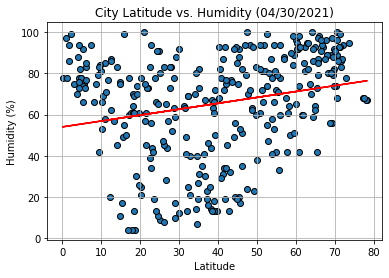

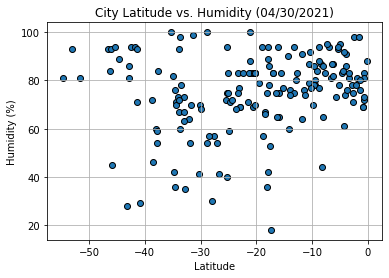

The r-value is: 0.2057536324977781


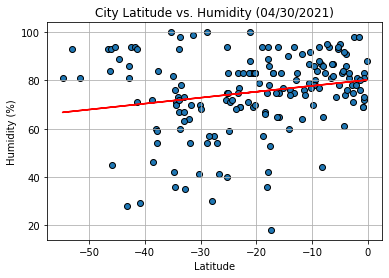

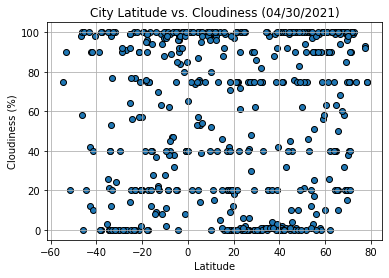

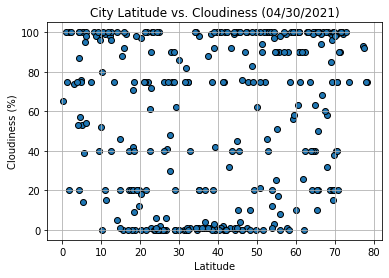

The r-value is: 0.12426897993482593


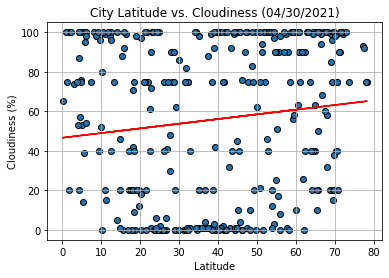

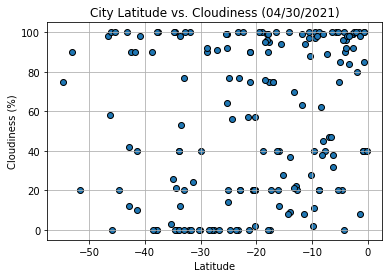

The r-value is: 0.19288624173075233


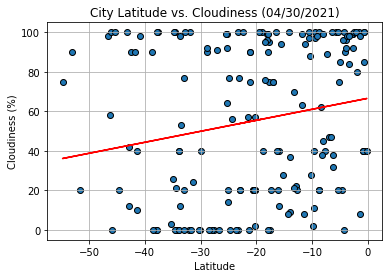

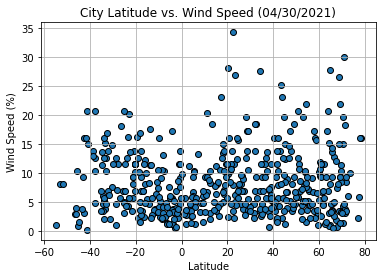

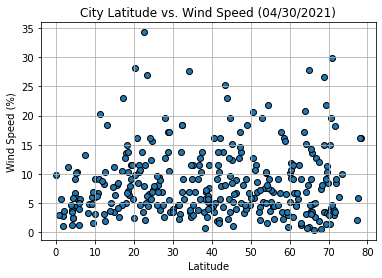

The r-value is: 0.054021867685807974


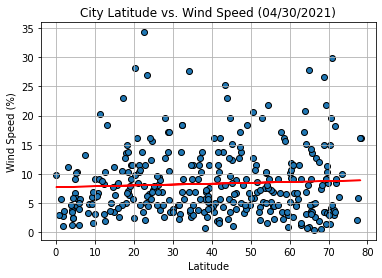

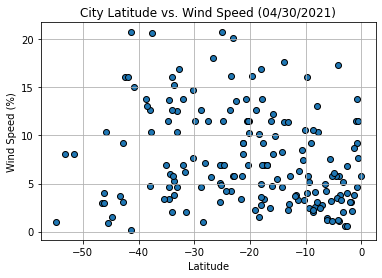

The r-value is: -0.21380325660977145


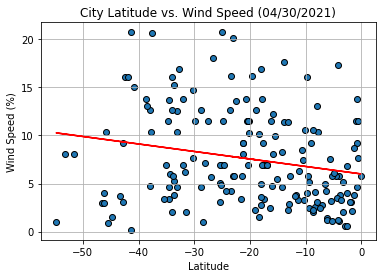

In [26]:
graphs = ['Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed']

for graph in graphs: 
    make_plot(graph, False, '')
    make_plot(graph, False, 'northern')
    make_plot(graph, True, 'northern')
    make_plot(graph, False, 'southern')
    make_plot(graph, True, 'southern')